In [4]:
# Date: 04 March 2024
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model


In [17]:
# Date
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [27]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)
predicted = logr.predict(np.array([5.8]).reshape(-1,1))

print(predicted)
logr.coef_

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

LogisticRegression()

[1]


array([[1.39510954]])

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [43]:
data_set= pd.read_csv('../datasets/user-data.csv', sep=",")  
data_set

test = data_set.iloc[:, [0, 1]].values # 0 Means first column user_id
x = data_set.iloc[:, [2,3]].values # Select Column, Age, and Estimated Salary 
y = data_set["purchased"] #  data_set.iloc[:, 4].values

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  



,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [44]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [48]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='warn', n_jobs=None, penalty='l2',  
                   random_state=0, solver='warn', tol=0.0001, verbose=0,  
                   warm_start=False)  


y_pred= classifier.predict(x_test)  
y_pred

LogisticRegression(random_state=0)

LogisticRegression(multi_class='warn', random_state=0, solver='warn')

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [58]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_true)   

NameError: name 'y_true' is not defined

(-2.9931891594584856, 3.1568108405413833)

(-2.5825424477554764, 3.3274575522443977)

/tmp/ipykernel_429927/3762868426.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


Text(0.5, 1.0, 'Logistic Regression (Training set)')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Estimated Salary')

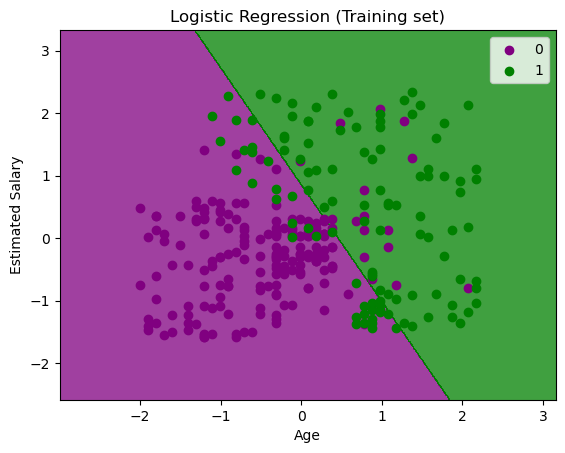

In [57]:
from matplotlib.colors import ListedColormap  
import matplotlib.pyplot as mtp

x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  